# Dependências

In [31]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [32]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
sales = pd.read_csv("sales.csv")

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 7.9+ KB


# Limpeza de Dados

In [35]:
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
 2   Holiday_Flag  143 non-null    int64         
 3   Temperature   143 non-null    float64       
 4   Fuel_Price    143 non-null    float64       
 5   CPI           143 non-null    float64       
 6   Unemployment  143 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 7.9 KB


In [36]:
def transforma_valores_milhar(valor_milhar):
    # Se o valor for maior que 1000, vamos supor que está multiplicado por 1000
    if valor_milhar > 1000:
        return valor_milhar / 1000
    else:
        return valor_milhar

# Aplica a transformação às colunas Fuel_Price e Unemployment
sales['Fuel_Price'] = sales['Fuel_Price'].apply(transforma_valores_milhar)
sales['Unemployment'] = sales['Unemployment'].apply(transforma_valores_milhar)


In [37]:
sales[sales.duplicated()]

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [38]:

sales.isnull().sum()
sales[(sales['Fuel_Price'] <= 0)]

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


# Visualização de Dados para Geração de Hipóteses

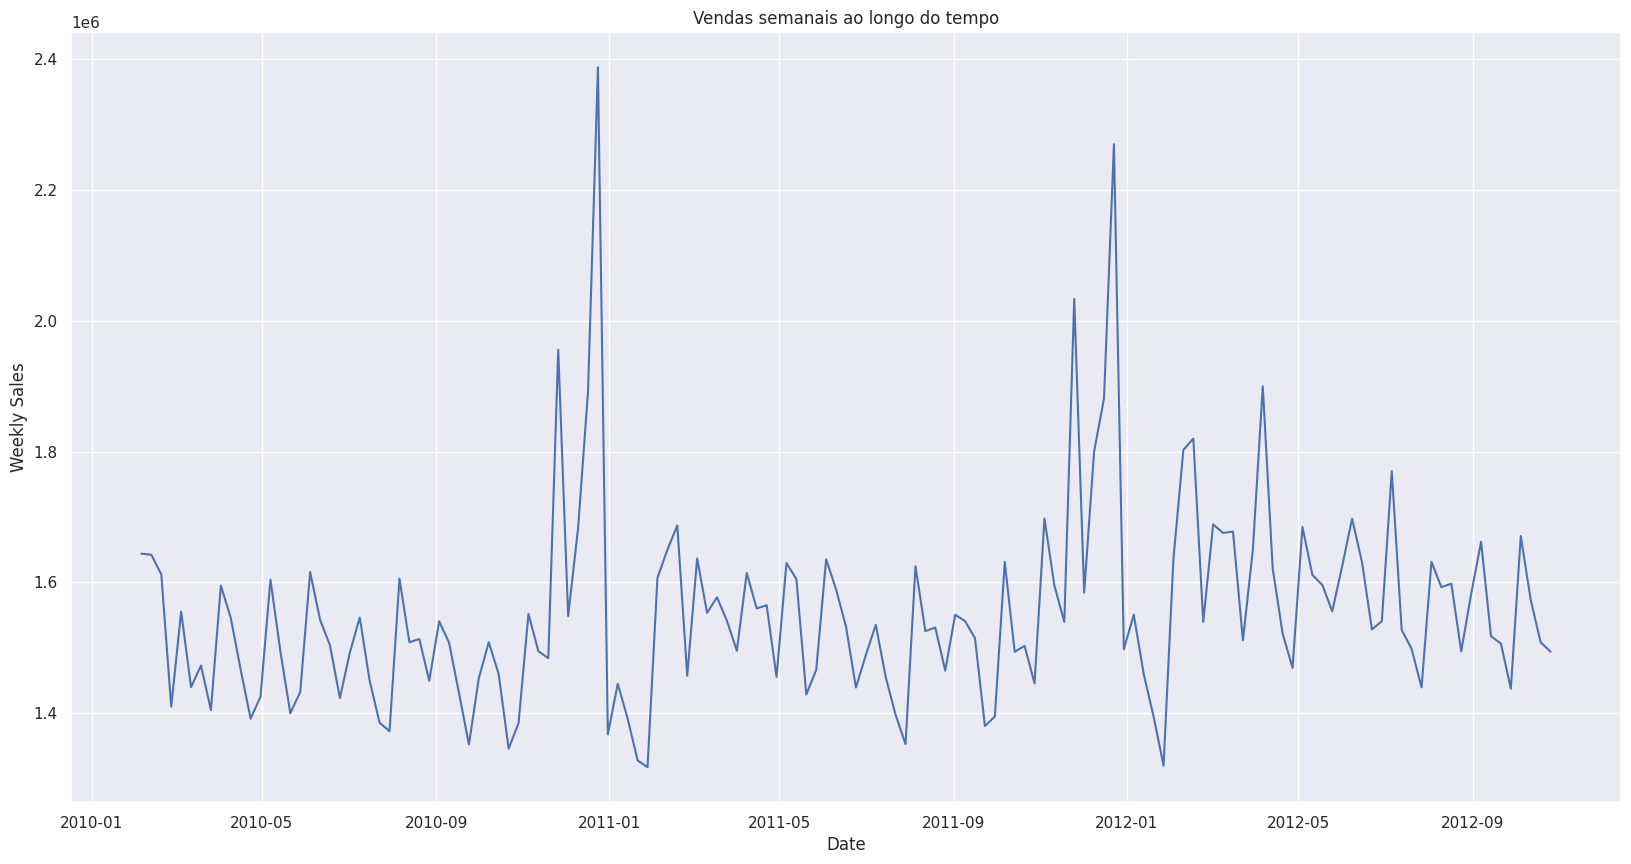

In [39]:

plt.figure(figsize=(20,10))

sales["Datetime"] = pd.to_datetime(sales["Date"], format="%d-%m-%Y")
Weekly_sales_change = sales.groupby("Datetime")["Weekly_Sales"].sum()
plt.plot(Weekly_sales_change.index, Weekly_sales_change.values)
plt.title("Vendas semanais ao longo do tempo")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.savefig("1- Vendas semanais ao longo do tempo.png")
plt.show()

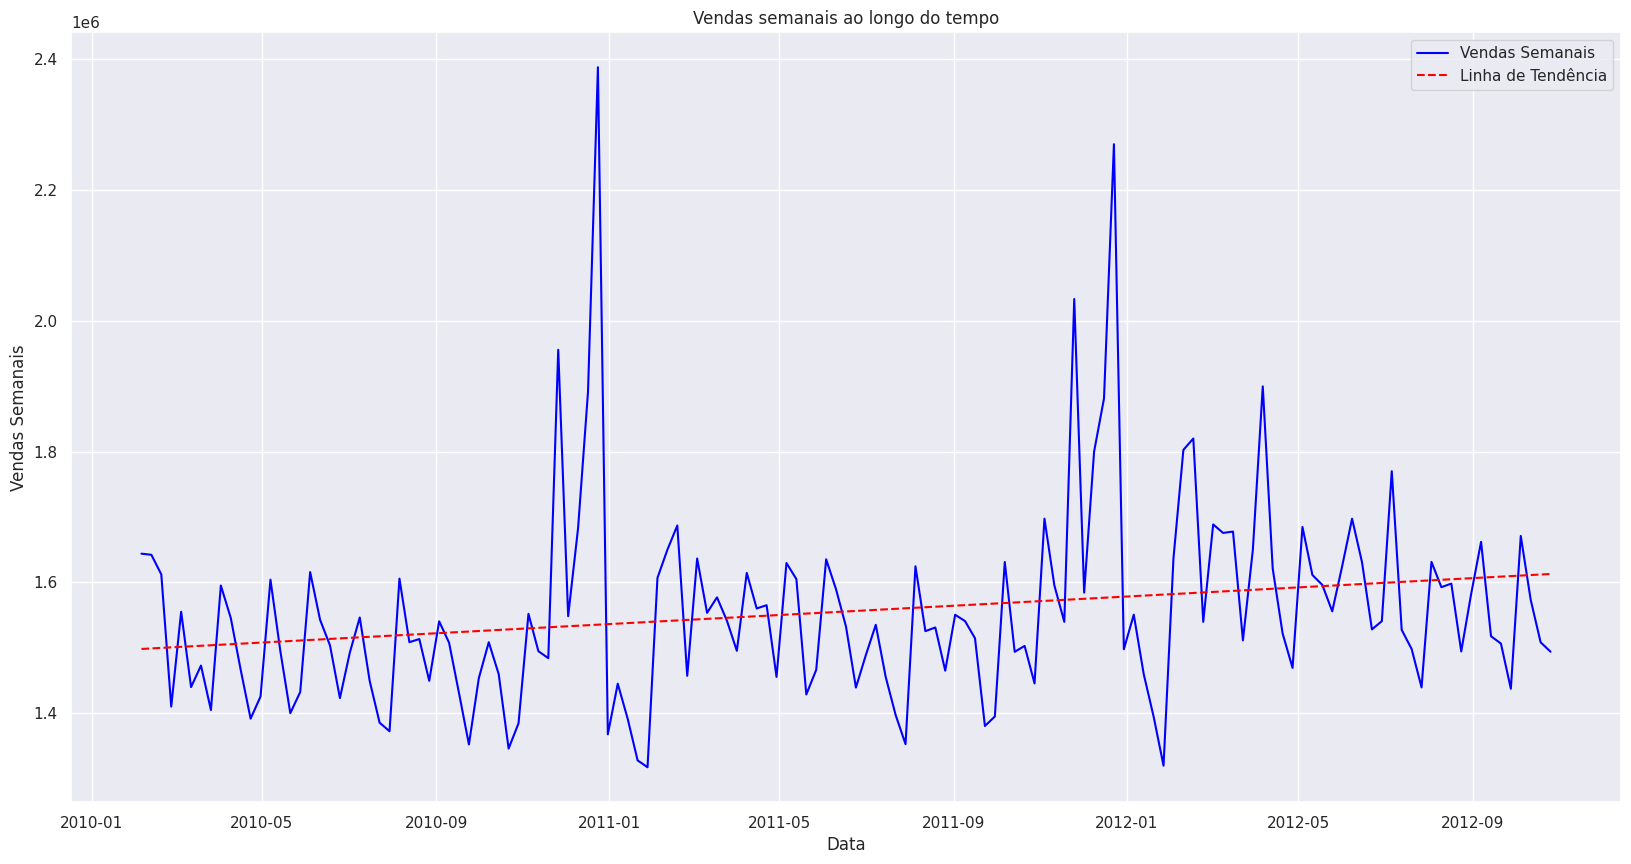

In [40]:
sales["Datetime"] = pd.to_datetime(sales["Date"], format="%d-%m-%Y")
Weekly_sales_change = sales.groupby("Datetime")["Weekly_Sales"].sum()

plt.figure(figsize=(20,10))
plt.plot(Weekly_sales_change.index, Weekly_sales_change.values, label="Vendas Semanais", color='blue')

x = np.arange(len(Weekly_sales_change))
y = Weekly_sales_change.values

slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept

plt.plot(Weekly_sales_change.index, trendline, label="Linha de Tendência", color='red', linestyle='--')
plt.title("Vendas semanais ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Vendas Semanais")
plt.legend()
plt.savefig("1- Vendas semanais com linha de tendência.png")
plt.show()

In [41]:
sales

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Datetime
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05
...,...,...,...,...,...,...,...,...
138,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012-09-28
139,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012-10-05
140,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012-10-12
141,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012-10-19


In [42]:
#Converter a data para um formato que podemos usar
def date_to_week(date):
    week_number = date.isocalendar()[1]
    return week_number
WeekOfTheYear = sales['Date'].apply(date_to_week)
sales['WeekOfTheYear'] = WeekOfTheYear

# Análise de Correlação Através de Gráficos de Dispersão: Identificação de Padrões e Relações Entre Variáveis

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

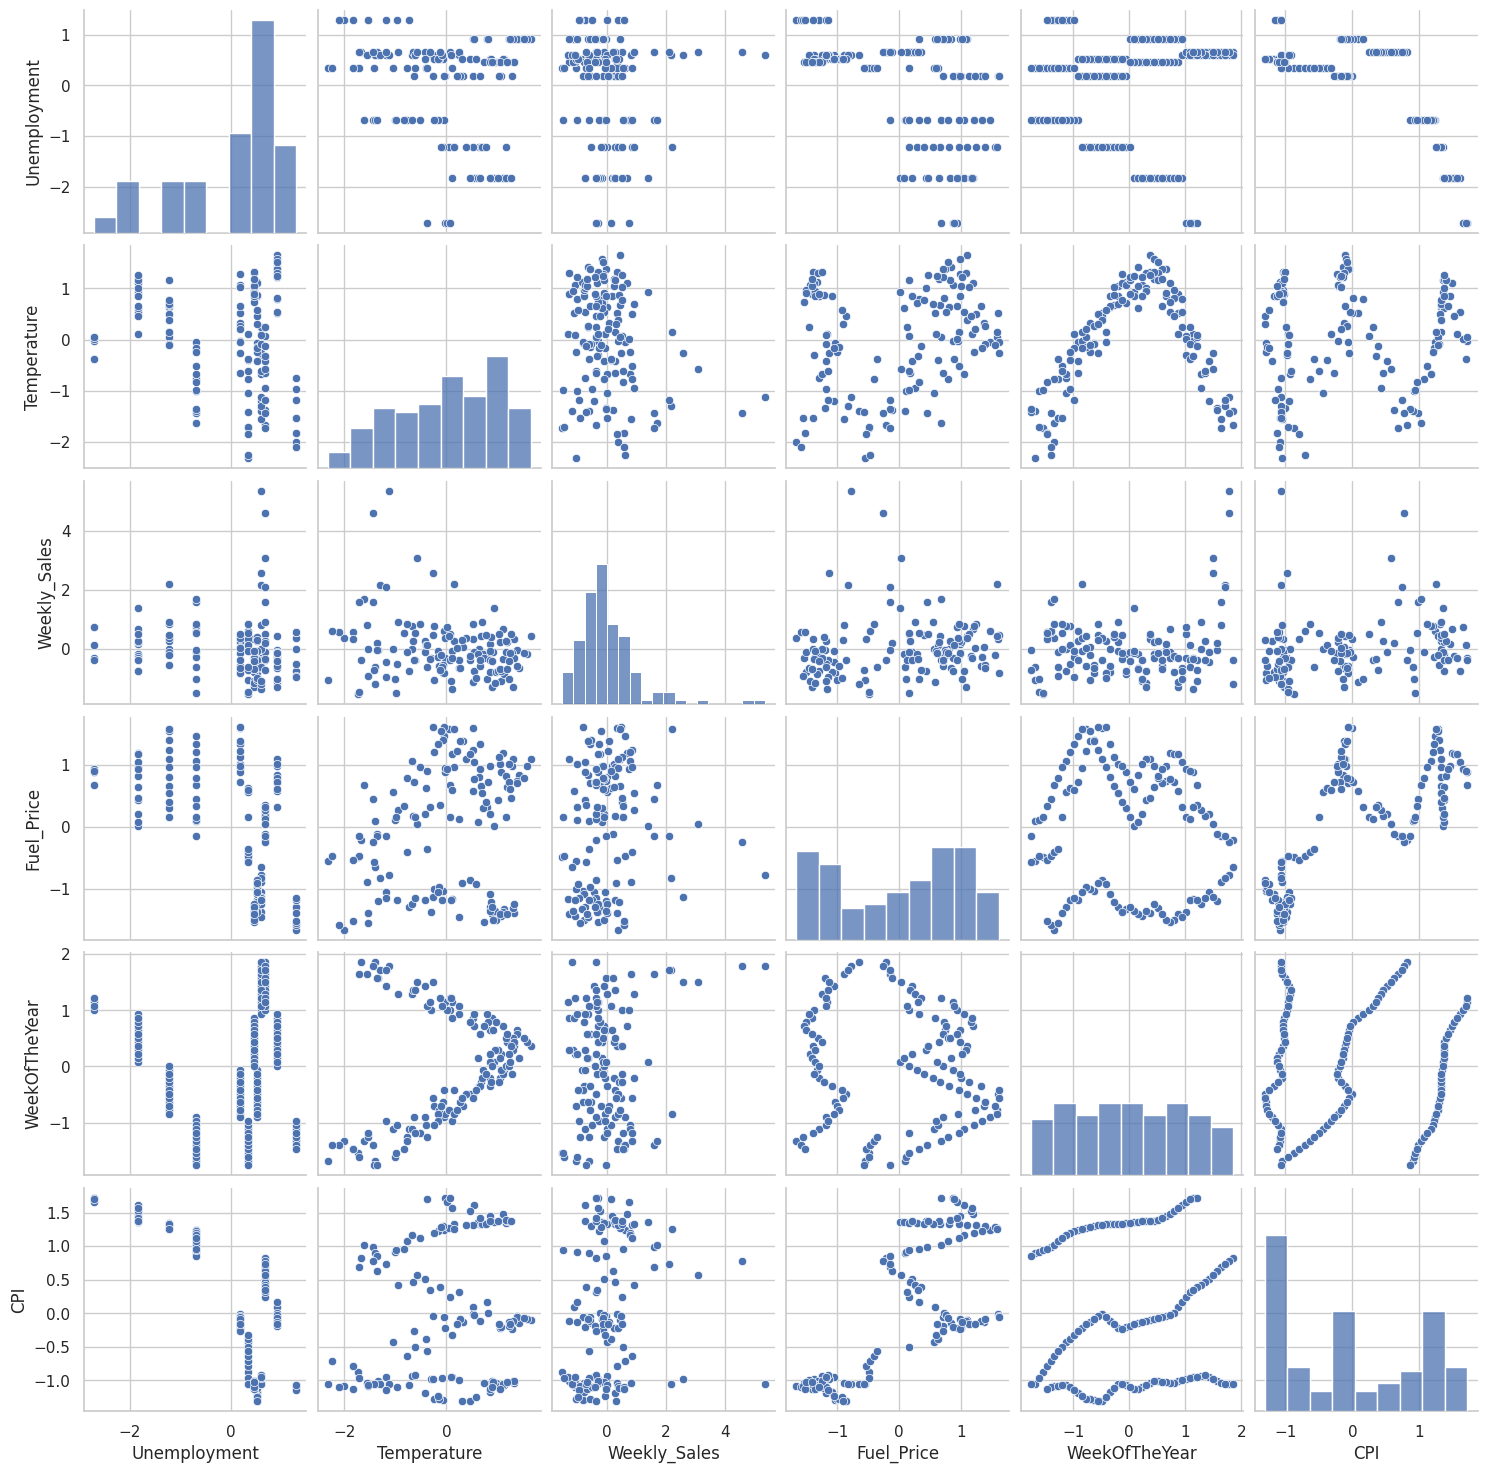

In [57]:
#Escala
Scaler = StandardScaler()
columns = ['Unemployment', 'Temperature', 'Weekly_Sales', 'Fuel_Price', 'WeekOfTheYear','CPI']
copy = sales.copy()
copy[columns] = Scaler.fit_transform(sales[columns])
plt.figure(figsize=(20,20))
sample_size = min(1000, len(copy[columns]))

plt.figure(figsize=(20, 20))
sns.pairplot(copy[columns].sample(sample_size))
plt.savefig("9- Pairplot.png")
plt.show()

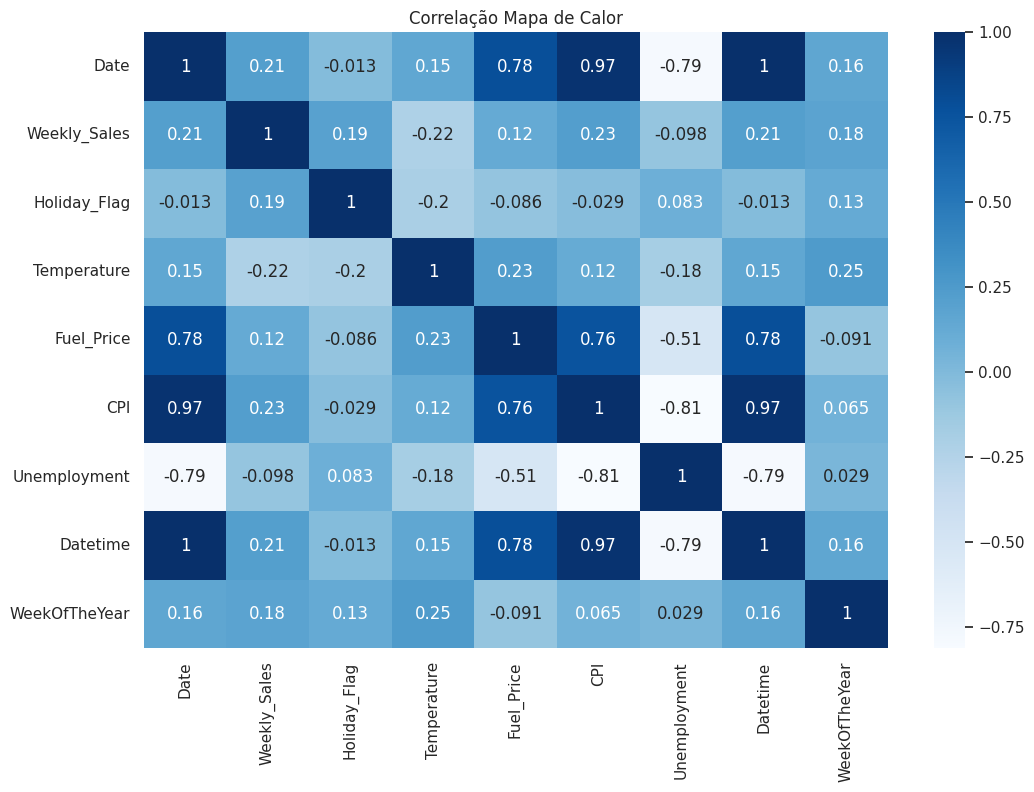

In [44]:
#Correlação
sales.isnull().sum()
corr = sales.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues').set_title('Correlação Mapa de Calor')
plt.savefig("Correlação Mapa de Calor.png")
plt.show()

# **Testes/Treino**

In [45]:
sales = sales.drop(columns=['Date', 'Datetime'])

In [46]:
continuous_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales', 'Holiday_Flag']
scaler = StandardScaler()
sales[continuous_vars] = scaler.fit_transform(sales[continuous_vars])

In [48]:
# Dividir os dados em conjuntos de treinamento e teste para utilizar nos modelos
train_x, test_x, train_y, test_y = train_test_split(sales.drop(['CPI','Temperature', 'Weekly_Sales', 'Fuel_Price'],
inplace=False, axis=1), sales['Weekly_Sales'], test_size=0.2, random_state=42)

In [49]:
#Validação
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
def avaliar_modelo(modelo, test_x, test_y):
    pred_y = modelo.predict(test_x)
    mse = mean_squared_error(test_y, pred_y)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y, pred_y)
    mape = mean_absolute_percentage_error(test_y, pred_y)
    r2 = r2_score(test_y, pred_y)

    print(f"Métricas para o modelo {modelo.__class__.__name__}:")
    print("Erro Quadrático Médio (MSE): %.2f" % mse)
    print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
    print("Média do Erro Absoluto (MAE): %.2f" % mae)
    print("Média Percentual do Erro Absoluto (MAPE): %.2f" % mape)
    print("Coeficiente de Determinação (R2): %.2f\n" % r2)
    return mae, r2

# Listas para armazenar os resultados
modelos = ['Random Forest', 'SVM', 'Linear Regression', 'XGBoost']
mae_values = []
r2_scores = []

# Avaliando o modelo Random Forest
forest = RandomForestRegressor()
forest.fit(train_x, train_y)
mae, r2 = avaliar_modelo(forest, test_x, test_y)
mae_values.append(mae)
r2_scores.append(r2)

# Avaliando o modelo SVM
svm = SVR()
svm.fit(train_x, train_y)
mae, r2 = avaliar_modelo(svm, test_x, test_y)
mae_values.append(mae)
r2_scores.append(r2)

# Avaliando o modelo Linear Regression
linear = LinearRegression()
linear.fit(train_x, train_y)
mae, r2 = avaliar_modelo(linear, test_x, test_y)
mae_values.append(mae)
r2_scores.append(r2)

# Avaliando o modelo XGBoost
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
mae, r2 = avaliar_modelo(xgb, test_x, test_y)
mae_values.append(mae)
r2_scores.append(r2)

Métricas para o modelo RandomForestRegressor:
Erro Quadrático Médio (MSE): 0.60
Raiz do Erro Quadrático Médio (RMSE): 0.78
Média do Erro Absoluto (MAE): 0.60
Média Percentual do Erro Absoluto (MAPE): 10.46
Coeficiente de Determinação (R2): 0.40

Métricas para o modelo SVR:
Erro Quadrático Médio (MSE): 1.10
Raiz do Erro Quadrático Médio (RMSE): 1.05
Média do Erro Absoluto (MAE): 0.76
Média Percentual do Erro Absoluto (MAPE): 1.75
Coeficiente de Determinação (R2): -0.10

Métricas para o modelo LinearRegression:
Erro Quadrático Médio (MSE): 0.98
Raiz do Erro Quadrático Médio (RMSE): 0.99
Média do Erro Absoluto (MAE): 0.70
Média Percentual do Erro Absoluto (MAPE): 5.85
Coeficiente de Determinação (R2): 0.02

Métricas para o modelo XGBRegressor:
Erro Quadrático Médio (MSE): 0.34
Raiz do Erro Quadrático Médio (RMSE): 0.58
Média do Erro Absoluto (MAE): 0.47
Média Percentual do Erro Absoluto (MAPE): 9.12
Coeficiente de Determinação (R2): 0.66



# **Validação Cruzada**

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def validar_xgboost_kfold(X, y, n_splits=5, random_state=42):

    # Inicializa o modelo de regressão XGBoost
    modelo = XGBRegressor(objective='reg:squarederror')

    # Configuração do K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    rmse_list = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(x_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse)

        print(f"Fold {fold + 1}: RMSE = {rmse:.2f}")

    mean_rmse = np.mean(rmse_list)
    print(f"RMSE Médio: {mean_rmse:.2f}")
    return f"RMSE Médio: {mean_rmse:.2f}"

# Chamar a função de validação
validar_xgboost_kfold(train_x.values, train_y.values, n_splits=5)

Fold 1: RMSE = 0.58
Fold 2: RMSE = 0.48
Fold 3: RMSE = 0.74
Fold 4: RMSE = 0.61
Fold 5: RMSE = 1.26
RMSE Médio: 0.74


'RMSE Médio: 0.74'

# Otimização de Modelo: XGBoost

In [52]:
best_model = XGBRegressor(
    colsample_bytree=1,
    learning_rate=0.9,
    max_depth=2,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.7,
    objective='reg:squarederror'
)

best_model.fit(train_x, train_y)

# Avaliação do modelo
predictions = best_model.predict(test_x)
mse = mean_squared_error(test_y, predictions)
rmse = mse ** 0.5
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print(f'Métricas para o modelo XGBRegressor:')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse}')
print(f'Média do Erro Absoluto (MAE): {mae}')
print(f'Coeficiente de Determinação (R2): {r2}')


Métricas para o modelo XGBRegressor:
Erro Quadrático Médio (MSE): 0.2787776980004725
Raiz do Erro Quadrático Médio (RMSE): 0.5279940321636907
Média do Erro Absoluto (MAE): 0.4144470743914599
Coeficiente de Determinação (R2): 0.7215373572205523


Ajustar os hiperparâmetros impacta diretamente o desempenho do modelo. Cada parâmetro controla um aspecto do aprendizado, e pequenas mudanças podem melhorar ou prejudicar a precisão. Abaixo, mostramos como os principais ajustes influenciam os resultados:

- **colsample_bytree**: Define a proporção de colunas amostradas para cada árvore. Com valor 1, usa todas as colunas, melhorando a precisão ao maximizar a informação disponível.

- **learning_rate**: Controla a contribuição de cada árvore no modelo. Um valor de 0.9 acelera o treinamento, mas pode aumentar o risco de overfitting, sendo eficaz para melhorar o desempenho.

- **max_depth**: Limita a profundidade das árvores, com valor 2 reduzindo a complexidade e evitando overfitting, ajudando a generalizar melhor.

- **min_child_weight**: Define o número mínimo de instâncias em uma folha. Com valor 1, permite que o modelo capture padrões mais sutis.

- **n_estimators**: Número de árvores no modelo. Com 300 árvores, aumenta a capacidade de captura de padrões, equilibrando desempenho e custo computacional.

- **subsample**: Proporção de dados usados para treinar cada árvore. Com 0.7, utiliza 70% dos dados, promovendo diversidade e reduzindo o risco de overfitting.

- **objective**: Função de perda utilizada. `reg:squarederror` minimiza o erro quadrático médio, ideal para regressão.


In [53]:
print('Modelo Com Hiperparãmetros')
100 * cross_val_score(best_model, train_x, train_y).mean()

Modelo Com Hiperparãmetros


39.60204602657126

In [54]:
print('Modelo Sem Hiperparãmetros')
100 * cross_val_score(xgb, train_x, train_y).mean()

Modelo Sem Hiperparãmetros


50.34676649477359

### Visualização que compara os dados preditos com os reais para as semanas do conjunto de teste, permitindo avaliar a precisão das previsões ao longo do tempo. Essa análise ajuda a identificar se o modelo está capturando corretamente os padrões dos dados e a detectar possíveis discrepâncias entre as previsões e os resultados reais. O comportamento esperado é que as previsões sigam de perto os valores reais.

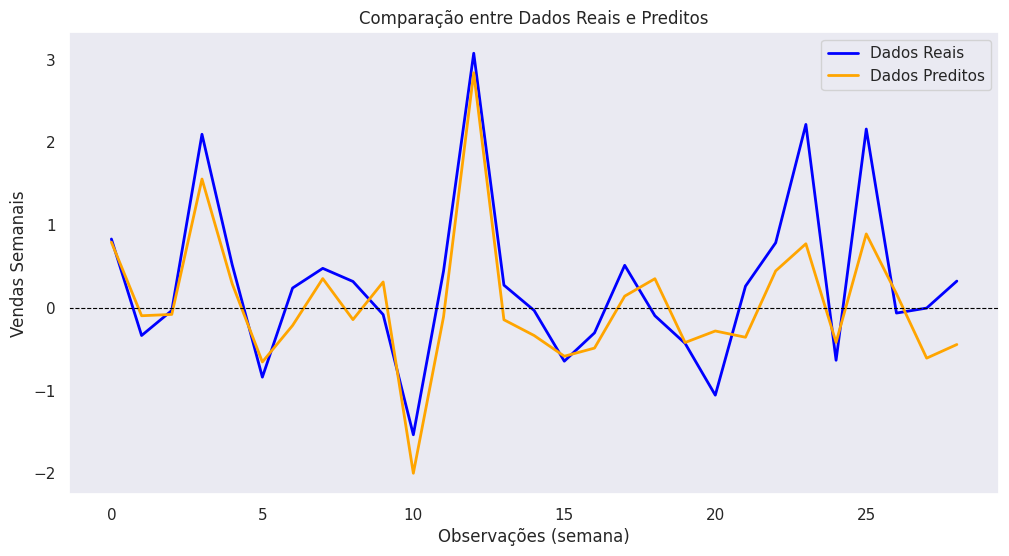

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supondo que best_model, train_x, train_y, test_x, e test_y já estão definidos e ajustados

# Avaliação do modelo
predictions = best_model.predict(test_x)
mse = mean_squared_error(test_y, predictions)
rmse = mse ** 0.5
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

# Criar um gráfico com dados reais e preditos
plt.figure(figsize=(12, 6))
plt.plot(test_y.values, label='Dados Reais', color='blue', linewidth=2)
plt.plot(predictions, label='Dados Preditos', color='orange', linewidth=2)
plt.title('Comparação entre Dados Reais e Preditos')
plt.xlabel('Observações (semana)')
plt.ylabel('Vendas Semanais')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid()
plt.show()


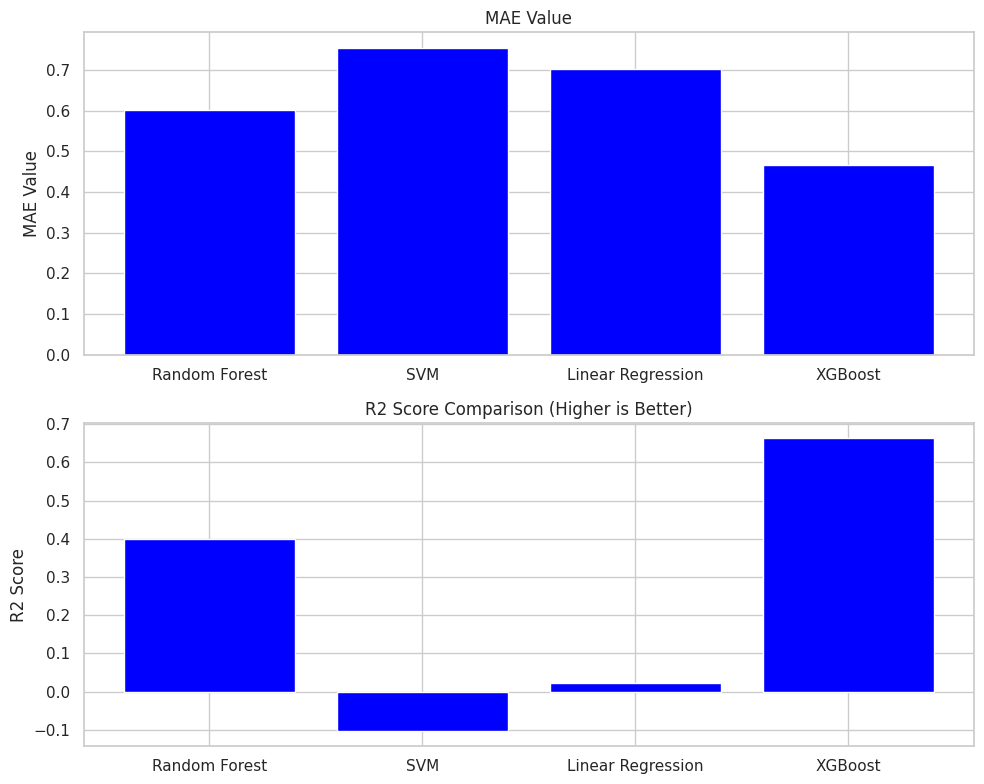

In [56]:
# Configuração do estilo
sns.set(style="whitegrid")

# Criar a figura e eixos para os gráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de MAE
axes[0].bar(modelos, mae_values, color='blue')
axes[0].set_title("MAE Value")
axes[0].set_ylabel("MAE Value")

# Gráfico de R2 Score
axes[1].bar(modelos, r2_scores, color='blue')
axes[1].set_title("R2 Score Comparison (Higher is Better)")
axes[1].set_ylabel("R2 Score")

# Exibir os gráficos
plt.tight_layout()
plt.show()